In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams['figure.figsize'] = (17,15)

### Idea: ver si el dataset es especialmente bueno para KNN

Esto significa que si agarro el dataset de entrada cada clase está en un cluster bien definido en el espacio.

In [3]:
#Constantes
N_SUJETOS = 41
N_FOTOS = 10

In [4]:
fotosXsujeto = {}
promedio = [[] for i in range(N_SUJETOS)]

for suj in range(N_SUJETOS):
    fotosXsujeto[suj] = []
    for foto in range(N_FOTOS):
        img = Image.open('../assets/ImagenesCaras/s{}/{}.pgm'.format(suj+1, foto+1))
        fotosXsujeto[suj].append(np.array(img).ravel())
        if len(promedio[suj]) == 0:
            promedio[suj] = np.array(img).ravel()
        else:
            promedio[suj] = (promedio[suj] + np.array(img).ravel())/2

In [5]:
stats = 'Promedio: {}, Maximo: {}, Desvío estándar: {}\n'

#Una foto de cada persona para comparar distancias

#Diccionario que por representante tiene una matriz 
#tal que distanciaXsujeto[suj][n][m] = 
#        distancia del representante suj a la foto m-esima del sujeto n

distanciaXsujeto = {}
empty_m = np.empty(shape=(N_SUJETOS, N_FOTOS))


for idx,rep in enumerate(promedio):
    distanciaXsujeto[idx] = np.array(empty_m, copy=True)

    for suj in range(N_SUJETOS):
        for foto in range(N_FOTOS):
            y = fotosXsujeto[suj][foto]
            dist = np.linalg.norm(rep - y)
            distanciaXsujeto[idx][suj][foto] = dist

In [81]:
lista = sorted([(x, i) for i, x in enumerate(np.mean(distanciaXsujeto[8], axis=1))])
lista

[(2515.949527855679, 8),
 (3782.4848035714663, 3),
 (3802.8601253553256, 22),
 (3809.382816473046, 20),
 (3842.5127026851187, 2),
 (3920.6894480177725, 37),
 (3923.1224610365934, 29),
 (4008.716943563895, 24),
 (4113.884230419682, 16),
 (4172.189559035998, 39),
 (4299.925958565013, 4),
 (4326.2173400159, 14),
 (4391.112771155694, 25),
 (4511.515980047865, 19),
 (4592.874085117031, 6),
 (4612.497198580639, 28),
 (4653.395191630249, 35),
 (4705.958332040301, 11),
 (4715.9992498151205, 30),
 (4751.48892347695, 34),
 (4860.204677013078, 9),
 (4868.053292344439, 17),
 (4869.451614215251, 23),
 (4900.800772109303, 5),
 (5176.474853709805, 0),
 (5254.643101340379, 32),
 (5259.937031381161, 1),
 (5261.9335684511725, 7),
 (5322.700642324502, 21),
 (5432.709794681232, 12),
 (5441.444959870647, 38),
 (5451.862934175783, 15),
 (5474.607630981514, 10),
 (5565.736171061389, 26),
 (5682.8061268800475, 31),
 (5692.959252955132, 27),
 (5781.174883011359, 36),
 (5915.5964739614055, 18),
 (5937.873645599

## Mirando imagenes en 3d

In [6]:
xs = []
ys = []
zs = []
tags = []
with open('visualizando-datos/Imagenes3d.out', 'r') as file:
    for i in range(410):
        x,y,z = map(float, file.readline().split())
        xs.append(x)
        ys.append(y)
        zs.append(z)
    tags = file.readline().split()

print([int(t) for t in tags if t == '1'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


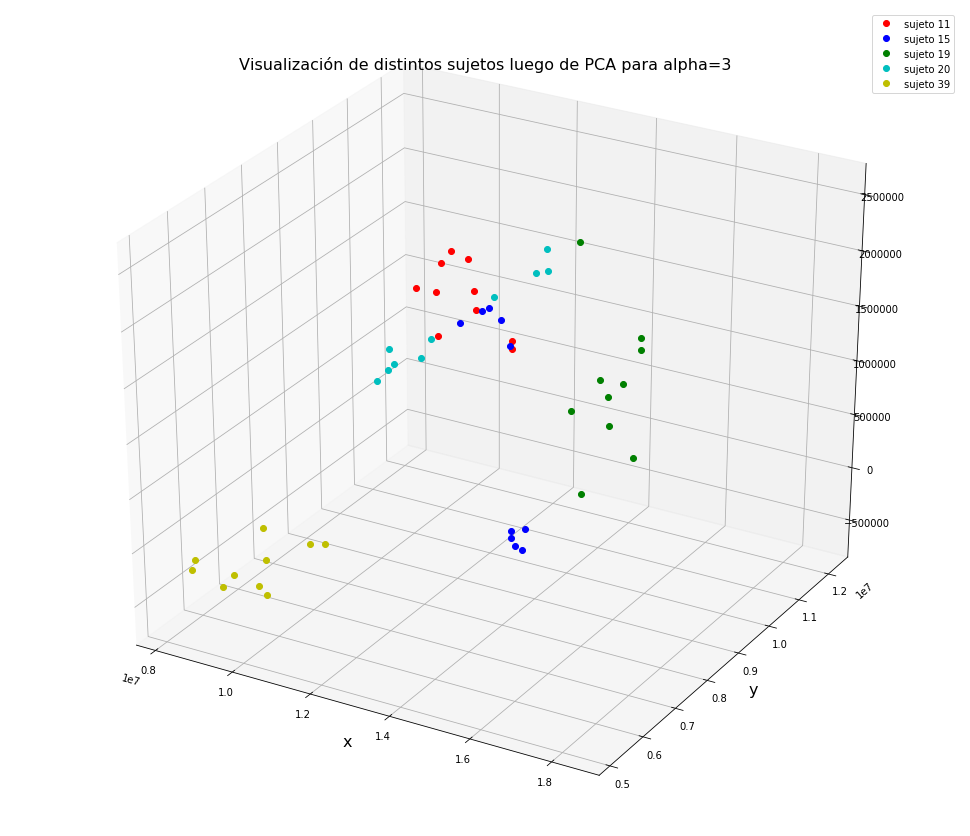

[[13891200.0, 13155900.0, 15309500.0, 12672000.0, 12274300.0, 15099300.0, 11987400.0, 12577100.0, 13519600.0, 11604700.0], [14452900.0, 13399700.0, 13781200.0, 13623000.0, 13181900.0, 13649500.0, 14005600.0, 13103100.0, 13159200.0, 12949600.0], [17773200.0, 17508500.0, 17984200.0, 17283700.0, 18003000.0, 18408200.0, 17489600.0, 15633400.0, 17671100.0, 16743400.0], [10545600.0, 10755600.0, 9351760.0, 9811820.0, 10548400.0, 9393860.0, 9567940.0, 12818500.0, 11936500.0, 11689400.0], [8872710.0, 9777180.0, 8640700.0, 9142850.0, 9243050.0, 9236640.0, 8240420.0, 9615480.0, 8910200.0, 9248540.0]] [[7361840.0, 8006100.0, 6731680.0, 7695670.0, 8240170.0, 6970060.0, 8443250.0, 8182800.0, 7740060.0, 8305820.0], [7697720.0, 8109240.0, 7875120.0, 9053690.0, 9691280.0, 8679180.0, 7949310.0, 9471390.0, 9270100.0, 8012310.0], [6963570.0, 6849440.0, 7191520.0, 6876840.0, 7189240.0, 6486620.0, 6096470.0, 8286130.0, 6687300.0, 6717890.0], [9626370.0, 9686800.0, 10011400.0, 9525520.0, 11849000.0, 9627160.

In [18]:
x_filt = []
y_filt = []
z_filt = []
tags_filt = []
colors = "rbgcym"
sujetos = [10,14,18,19,38]
for i in sujetos:
    x_filt.append([x for j,x in enumerate(xs) if int(tags[j]) == i+1])
    y_filt.append([y for j,y in enumerate(ys) if int(tags[j]) == i+1])
    z_filt.append([z for j,z in enumerate(zs) if int(tags[j]) == i+1])
    tags_filt.append([t for j,t in enumerate(tags) if int(tags[j]) == i+1])
    

fig = plt.figure()
ax = fig.gca(projection = '3d')
for i in range(len(sujetos)):
    ax.plot(x_filt[i], y_filt[i], z_filt[i], 'o', c=colors[i], label='sujeto {}'.format(sujetos[i]+1))
ax.legend()
plt.title("Visualización de distintos sujetos luego de PCA para alpha=3", fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.show()

print(x_filt, y_filt, z_filt)

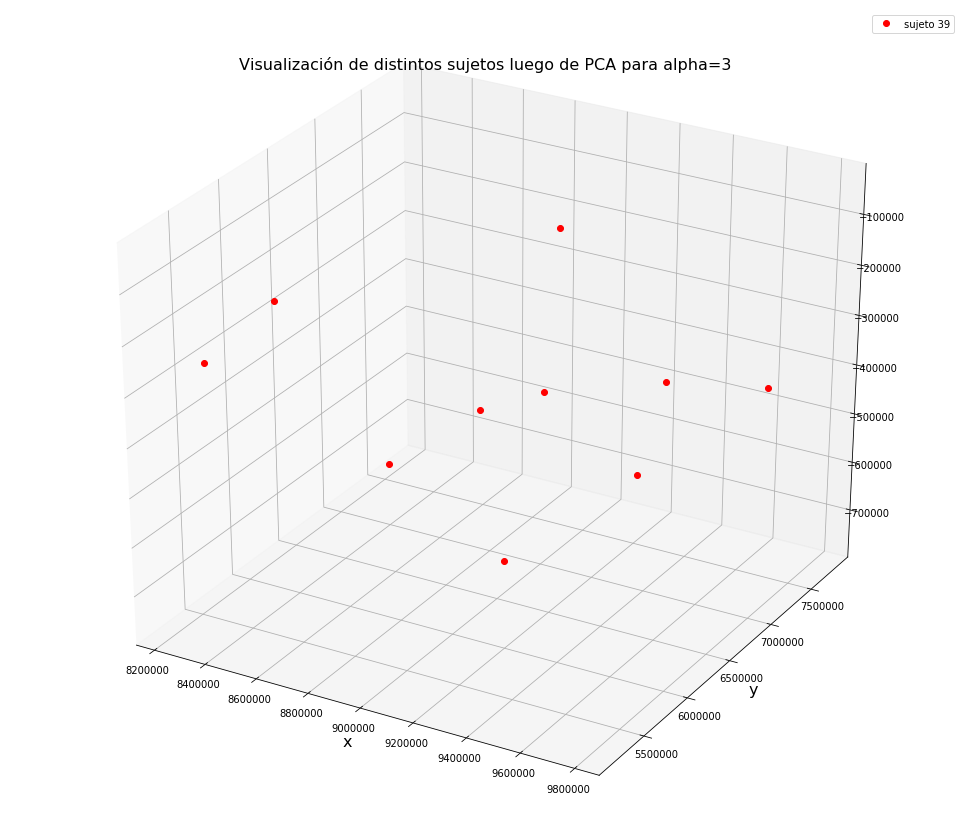

In [21]:
x_filt = []
y_filt = []
z_filt = []
tags_filt = []
colors = "rbgcym"
sujetos = [38]
for i in sujetos:
    x_filt.append([x for j,x in enumerate(xs) if int(tags[j]) == i+1])
    y_filt.append([y for j,y in enumerate(ys) if int(tags[j]) == i+1])
    z_filt.append([z for j,z in enumerate(zs) if int(tags[j]) == i+1])
    tags_filt.append([t for j,t in enumerate(tags) if int(tags[j]) == i+1])
    

fig = plt.figure()
ax = fig.gca(projection = '3d')
for i in range(len(sujetos)):
    ax.plot(x_filt[i], y_filt[i], z_filt[i], 'o', c=colors[i], label='sujeto {}'.format(sujetos[i]+1))
ax.legend()
plt.title("Visualización de distintos sujetos luego de PCA para alpha=3", fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.show()